<a href="https://colab.research.google.com/github/lokeshpara/Deeplearning/blob/S11/EVA_session11_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA/S11/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA/S11


#Importing modules


In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
import random
from math import floor
from GradCAM.gradcam_visualize import GradCAMView
import train11
import test11
#from lr_finder import LRFinder
#from torch.optim.lr_scheduler import ReduceLROnPlateau
#from lr_range_test import LR_Range_Test
from torch.optim.lr_scheduler import OneCycleLR

#Dataloader


In [3]:
import dataloader11
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


#Visualize images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


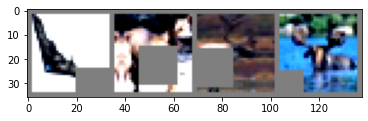

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(dataloader11.train_loader_Alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#model Total parameters

In [5]:
import model11
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model11.Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

#LR_Range_Test


In [6]:
from lr_range_test import LR_Range_Test
loss_func = nn.CrossEntropyLoss()
LR_Range_Test(0.01, 0.0001 ,device, 10 ,model,loss_func,dataloader11.train_loader_Albumentation )

epoch = 1 Lr = 0.0001  Loss=1.964650273323059 Batch_id=97 Accuracy=21.20: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]
epoch = 2 Lr = 0.00109  Loss=1.5695947408676147 Batch_id=97 Accuracy=36.26: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]
epoch = 3 Lr = 0.0020800000000000003  Loss=1.338624358177185 Batch_id=97 Accuracy=40.11: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
epoch = 4 Lr = 0.0030700000000000002  Loss=1.2938122749328613 Batch_id=97 Accuracy=40.94: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]
epoch = 5 Lr = 0.00406  Loss=1.3720594644546509 Batch_id=97 Accuracy=41.04: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
epoch = 6 Lr = 0.005050000000000001  Loss=1.2757200002670288 Batch_id=97 Accuracy=40.68: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
epoch = 7 Lr = 0.00604  Loss=1.3592596054077148 Batch_id=97 Accuracy=35.17: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]
epoch = 8 Lr = 0.00703  Loss=1.686309576034546 Batch_id=97 Accuracy=24.54: 100%|██████████| 98

#

#LR v/s Accuracy plot


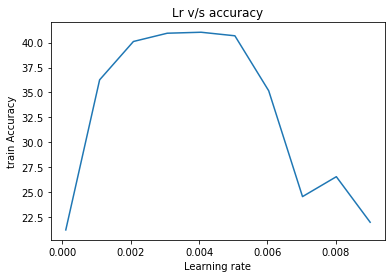

In [10]:
import lr_range_test
plt.plot( lr_range_test.Lr , lr_range_test.Lr_acc)
plt.ylabel('train Accuracy')
plt.xlabel("LR")
plt.title("Lr v/s accuracy")
plt.show()

In [0]:
model =  model11.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01 , momentum=0.9, weight_decay=0.005) 
#scheduler = ReduceLROnPlateau(optimizer, patience = 3,min_lr=1e-4)
scheduler = OneCycleLR(optimizer,max_lr = 0.04006 ,total_steps=None,epochs=24,steps_per_epoch=1,pct_start=0.208,anneal_strategy="linear",cycle_momentum=False,base_momentum=0.85,max_momentum=0.95,div_factor=10.0,final_div_factor=1)
loss_func=nn.CrossEntropyLoss()
LR = []
for epoch in range(24):
   
    lr = optimizer.param_groups[0]['lr']
    LR.append(lr)
    print("Epoch:", epoch ," LR: ", lr)
    train11.train(model, device, dataloader11.train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test11.test(model, device, dataloader11.test_loader, loss_func, last_epoch=True)
   # scheduler.step(test10.test_losses[-1])
    scheduler.step()

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 0  LR:  0.004006


Epoch= 0 Loss=1.2516883611679077 Batch_id=97 Accuracy=40.78: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5210/10000 (52.10%)

Epoch: 1  LR:  0.013037563126252504


Epoch= 1 Loss=1.0955380201339722 Batch_id=97 Accuracy=49.13: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6177/10000 (61.77%)

Epoch: 2  LR:  0.022069126252505004


Epoch= 2 Loss=1.0758836269378662 Batch_id=97 Accuracy=61.50: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6974/10000 (69.74%)

Epoch: 3  LR:  0.03110068937875751


Epoch= 3 Loss=0.8458300232887268 Batch_id=97 Accuracy=65.65: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6371/10000 (63.71%)

Epoch: 4  LR:  0.04004482575757576


Epoch= 4 Loss=0.8613706231117249 Batch_id=97 Accuracy=71.24: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7249/10000 (72.49%)

Epoch: 5  LR:  0.038148045454545455


Epoch= 5 Loss=0.6509148478507996 Batch_id=97 Accuracy=75.51: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7753/10000 (77.53%)

Epoch: 6  LR:  0.03625126515151515


Epoch= 6 Loss=0.6485002636909485 Batch_id=97 Accuracy=78.12: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7756/10000 (77.56%)

Epoch: 7  LR:  0.03435448484848485


Epoch= 7 Loss=0.6067997813224792 Batch_id=97 Accuracy=80.08: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7828/10000 (78.28%)

Epoch: 8  LR:  0.032457704545454547


Epoch= 8 Loss=0.6238608360290527 Batch_id=97 Accuracy=81.28: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8376/10000 (83.76%)

Epoch: 9  LR:  0.030560924242424244


Epoch= 9 Loss=0.5169017314910889 Batch_id=97 Accuracy=82.86: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8168/10000 (81.68%)

Epoch: 10  LR:  0.02866414393939394


Epoch= 10 Loss=0.43575626611709595 Batch_id=97 Accuracy=83.65: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8436/10000 (84.36%)

Epoch: 11  LR:  0.026767363636363634


Epoch= 11 Loss=0.4167039096355438 Batch_id=97 Accuracy=84.51: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8175/10000 (81.75%)

Epoch: 12  LR:  0.024870583333333335


Epoch= 12 Loss=0.4289952218532562 Batch_id=97 Accuracy=85.05: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8592/10000 (85.92%)

Epoch: 13  LR:  0.022973803030303032


Epoch= 13 Loss=0.4018547534942627 Batch_id=97 Accuracy=86.00: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8660/10000 (86.60%)

Epoch: 14  LR:  0.02107702272727273


Epoch= 14 Loss=0.3695421516895294 Batch_id=97 Accuracy=86.82: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8482/10000 (84.82%)

Epoch: 15  LR:  0.019180242424242423


Epoch= 15 Loss=0.304838091135025 Batch_id=97 Accuracy=87.43: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8771/10000 (87.71%)

Epoch: 16  LR:  0.017283462121212123


Epoch= 16 Loss=0.33727604150772095 Batch_id=97 Accuracy=88.32: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8714/10000 (87.14%)

Epoch: 17  LR:  0.01538668181818182


Epoch= 17 Loss=0.312664657831192 Batch_id=97 Accuracy=88.76: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8823/10000 (88.23%)

Epoch: 18  LR:  0.013489901515151517


Epoch= 18 Loss=0.33316412568092346 Batch_id=97 Accuracy=89.43: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8999/10000 (89.99%)

Epoch: 19  LR:  0.011593121212121214


Epoch= 19 Loss=0.2756505310535431 Batch_id=97 Accuracy=90.38: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9039/10000 (90.39%)

Epoch: 20  LR:  0.009696340909090911


Epoch= 20 Loss=0.2355675995349884 Batch_id=97 Accuracy=91.17: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8919/10000 (89.19%)

Epoch: 21  LR:  0.0077995606060606085


Epoch= 21 Loss=0.253264844417572 Batch_id=97 Accuracy=92.01: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9123/10000 (91.23%)

Epoch: 22  LR:  0.0059027803030303055


Epoch= 22 Loss=0.17823481559753418 Batch_id=97 Accuracy=92.72: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9193/10000 (91.93%)

Epoch: 23  LR:  0.004006000000000003


Epoch= 23 Loss=0.1974107176065445 Batch_id=97 Accuracy=93.89: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.0004, Accuracy: 9222/10000 (92.22%)



#LR plot


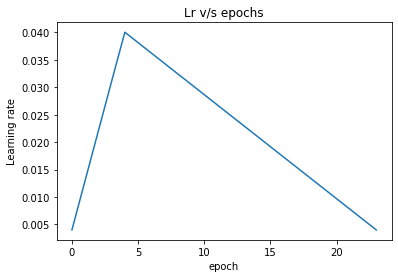

In [0]:
plt.plot(LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()

#Test_class_performs

In [0]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(dataloader11.test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 20/20 [00:02<00:00,  8.55it/s]

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 100 %
Accuracy of  deer : 100 %
Accuracy of   dog : 87 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 83 %


#train_&_test_accuracy

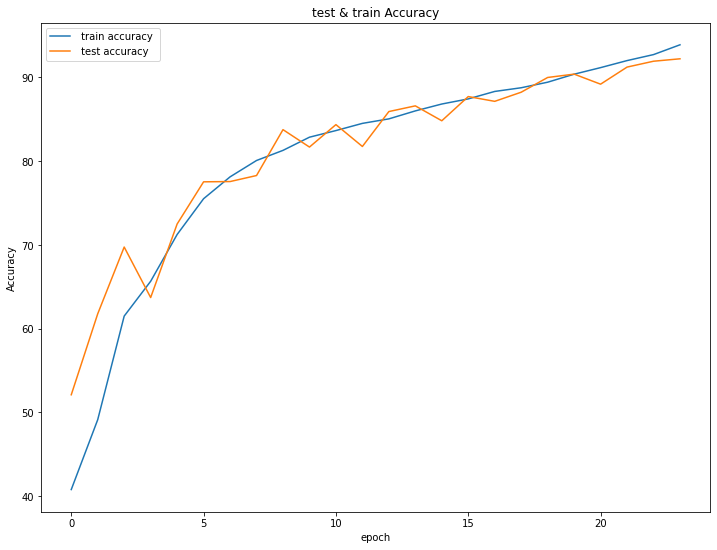

In [0]:
fig, axs = plt.subplots(1,1,figsize=(12,9))
plt.plot(train11.train_acc)
plt.plot(test11.test_acc)

plt.title('test & train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend([" train accuracy ", ' test accuracy '], loc='best')
plt.show()

#Cyclic LR plot

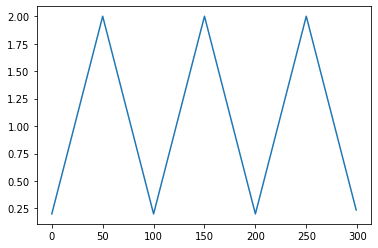

In [11]:
def Cyclic_triangular(iterations , min_lr , max_lr , step_size):
  lr_plot =[]
  for iteration in range(iterations):
    cycle = floor(1+iteration/(2*step_size))
    x = np.abs(iteration/step_size - 2*cycle + 1)
    lr = min_lr + (max_lr-min_lr)*(1-x)
    lr_plot.append(lr)
  plt.plot(list(range(iterations)),lr_plot)
Cyclic_triangular(300,0.2,2,50)